<a href="https://colab.research.google.com/github/joserlandero/Aprendizaje-Automatico/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nueva base de datos

**Cambio en la base de datos**

Hola maestro, la razón por la cual no había avanzado con la tarea 4 en adelante es porque al realizar la tarea 3 donde se hizo el análisis de las variables del dataframe, no me convenció lo que vi y recientemente encontre este dataframe sobre la salud el cual se puede usar como clasificacion o regresión

In [13]:
#Recargamos la base de datos del cafe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/medical_insurance.csv')

In [3]:
df.head(5)

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [8]:
#Vemos que hay null en alcohol_freq
#lo remplazamos con "No aplica" string
df['alcohol_freq'].unique()
df["alcohol_freq"] = df["alcohol_freq"].apply(lambda x: "NoAplica" if pd.isna(x) else x)
df['alcohol_freq'].unique()

array(['NoAplica', 'Weekly', 'Daily', 'Occasional'], dtype=object)

In [6]:
df.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [12]:
#revisamos q ya no hayan NA
df.shape[0] == df.dropna().shape[0]

True

# Análisis de variable Y

**Mi variable Y será: annual_medical_cost**

Query sacado de Kaggle solamente para aprovechar el tecleo de cada gráfica


4. MEDICAL COSTS ANALYSIS
--------------------------------------------------------------------------------
Annual Medical Cost Statistics:
  Mean: $3,006.57
  Median: $2,084.59
  Std Dev: $3,111.91
  Min: $55.87
  Max: $63,482.48


/tmp/ipython-input-941708962.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1, 0].bar(['Non-Smoker', 'Smoker'], [smoker_cost.get(0, 0), smoker_cost.get(1, 0)],


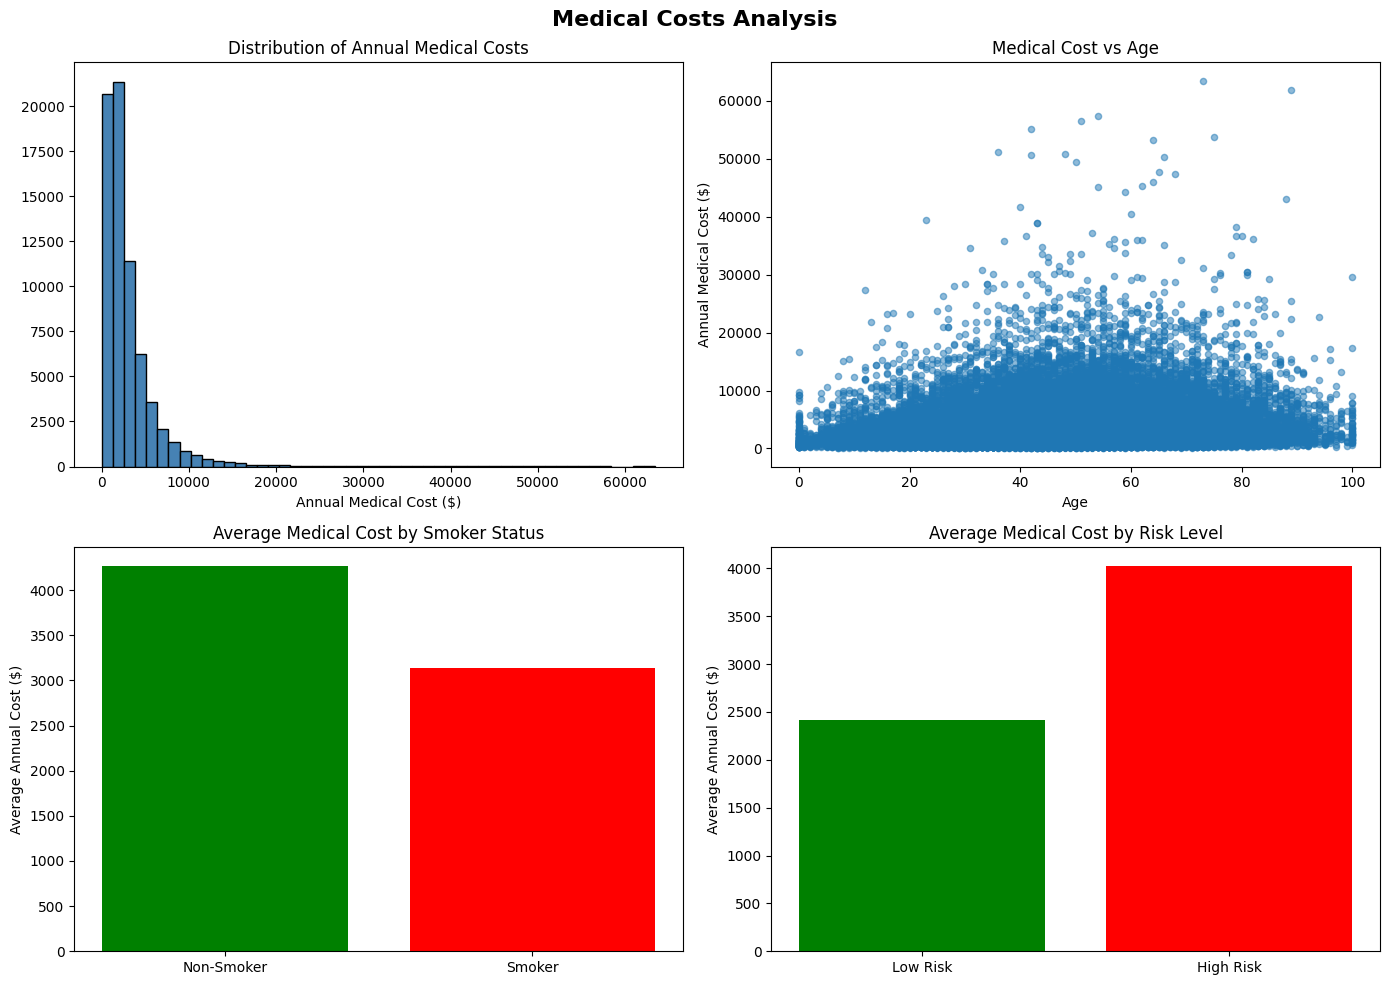

In [14]:
print("\n4. MEDICAL COSTS ANALYSIS")
print("-" * 80)
df_clean = df.dropna()
print(f"Annual Medical Cost Statistics:")
print(f"  Mean: ${df_clean['annual_medical_cost'].mean():,.2f}")
print(f"  Median: ${df_clean['annual_medical_cost'].median():,.2f}")
print(f"  Std Dev: ${df_clean['annual_medical_cost'].std():,.2f}")
print(f"  Min: ${df_clean['annual_medical_cost'].min():,.2f}")
print(f"  Max: ${df_clean['annual_medical_cost'].max():,.2f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Medical Costs Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist(df_clean['annual_medical_cost'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Annual Medical Costs')
axes[0, 0].set_xlabel('Annual Medical Cost ($)')

# Cost by Age
axes[0, 1].scatter(df_clean['age'], df_clean['annual_medical_cost'], alpha=0.5, s=20)
axes[0, 1].set_title('Medical Cost vs Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Annual Medical Cost ($)')

# Cost by Smoker Status
smoker_cost = df_clean.groupby('smoker')['annual_medical_cost'].mean()
axes[1, 0].bar(['Non-Smoker', 'Smoker'], [smoker_cost.get(0, 0), smoker_cost.get(1, 0)],
               color=['green', 'red'])
axes[1, 0].set_title('Average Medical Cost by Smoker Status')
axes[1, 0].set_ylabel('Average Annual Cost ($)')

# Cost by Risk Level
risk_cost = df_clean.groupby('is_high_risk')['annual_medical_cost'].mean()
axes[1, 1].bar(['Low Risk', 'High Risk'], [risk_cost.get(0, 0), risk_cost.get(1, 0)],
               color=['green', 'red'])
axes[1, 1].set_title('Average Medical Cost by Risk Level')
axes[1, 1].set_ylabel('Average Annual Cost ($)')

plt.tight_layout()
plt.show()

# Nuevo análisis de correlación

Top 15 Features Correlated with Annual Medical Cost:
annual_medical_cost            1.000000
monthly_premium                0.965379
annual_premium                 0.965379
total_claims_paid              0.737912
avg_claim_amount               0.633337
risk_score                     0.303429
chronic_count                  0.293056
is_high_risk                   0.249696
days_hospitalized_last_3yrs    0.225915
hospitalizations_last_3yrs     0.206141
visits_last_year               0.191868
claims_count                   0.173569
hypertension                   0.154873
had_major_procedure            0.146740
systolic_bp                    0.146345
Name: annual_medical_cost, dtype: float64


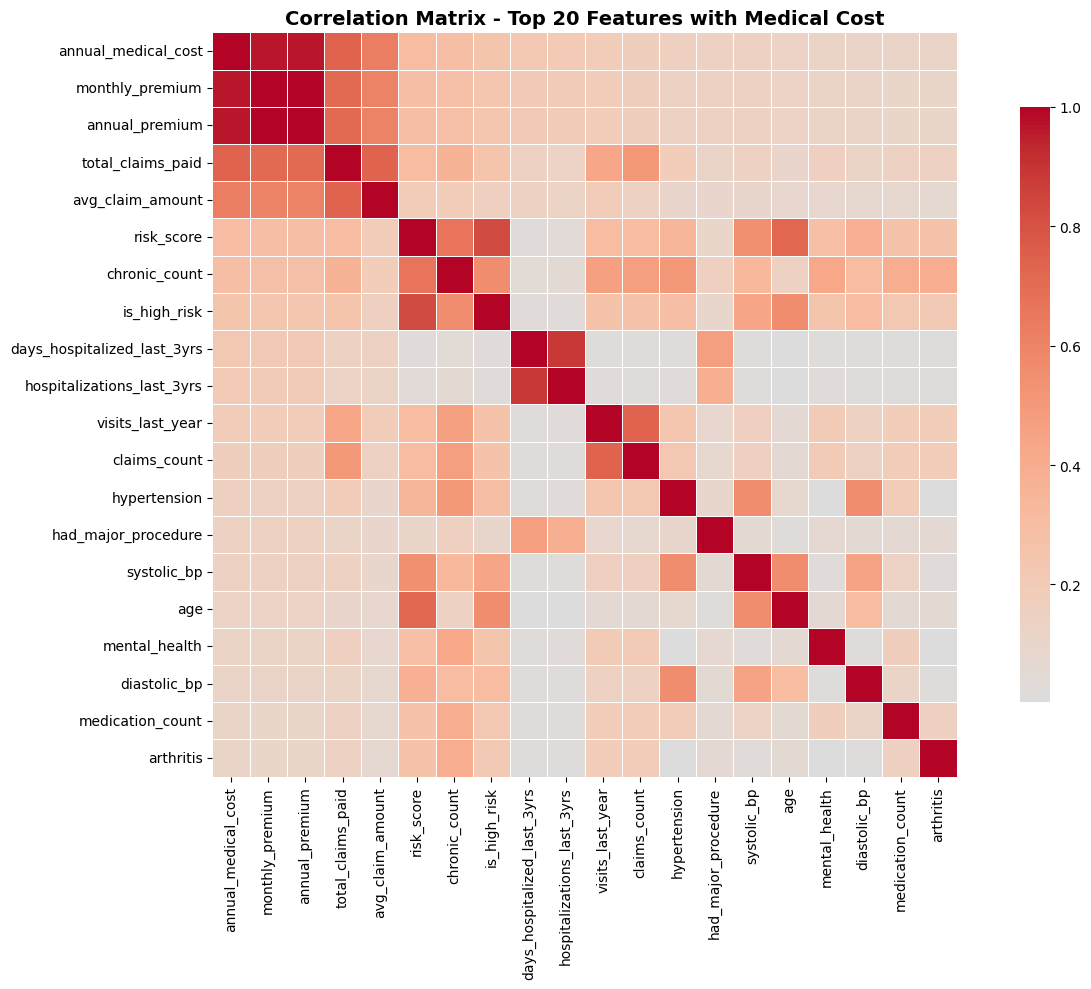

In [18]:
#Correlacion
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_cols].corr()

# Top correlations with medical cost
cost_corr = correlation_matrix['annual_medical_cost'].sort_values(ascending=False)
print("Top 15 Features Correlated with Annual Medical Cost:")
print(cost_corr.head(15))
# Correlation heatmap
plt.figure(figsize=(14, 10))
# Select top 20 correlated features for cleaner visualization
top_features = cost_corr.abs().nlargest(20).index
heatmap_data = df_clean[top_features].corr()
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 20 Features with Medical Cost', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Ahora si Tarea 4

## F Regresion

In [19]:
from sklearn.feature_selection import f_regression

In [32]:
#Tomaré todas las variables numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number])

X = numeric_cols.drop('annual_medical_cost', axis=1)
y = numeric_cols['annual_medical_cost']

valor_f = f_regression(X, y)

#Revisamos las variables mas importantes con alpha = 0.05
pasan_prueba = []
no_pasan_prueba = []
alpha = 0.05

for i in range(len(valor_f[1])):
    if valor_f[1][i] < alpha:
        pasan_prueba.append(X.columns[i])
    else:
        no_pasan_prueba.append(X.columns[i])

In [39]:
valor_f

(array([1.64571397e-01, 1.24344963e+03, 2.87630238e+00, 3.88845366e+00,
        1.79436785e+00, 1.39760957e+02, 2.67216374e+03, 3.10281975e+03,
        3.76020616e+03, 8.94320594e+02, 1.53013835e+03, 9.55384769e+02,
        3.22233129e+01, 4.73662872e+02, 3.52831056e-01, 2.57758835e+00,
        1.73789469e-05, 2.34330439e+00, 2.50631995e-06, 7.08977856e+03,
        9.57578570e+05, 9.57581225e+05, 2.17169030e+03, 4.68269924e+04,
        8.35805568e+04, 6.56856950e+03, 1.71817202e+03, 7.81015998e+02,
        4.12009943e+02, 3.13402993e+02, 4.21450665e+02, 2.15678185e+02,
        1.32516834e+02, 1.85530542e+02, 8.90379929e+02, 1.13311041e+03,
        2.21840876e+02, 4.39069815e+02, 1.16732056e+02, 1.71704686e+02,
        2.01938779e+02, 4.64893412e+03, 1.53859366e+03]),
 array([6.84983388e-001, 5.24148253e-270, 8.98966757e-002, 4.86231044e-002,
        1.80399243e-001, 3.22264768e-032, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.88922143e-195, 0.00000000e+000, 2.29009579e

In [38]:
print(f"No pasaron la prueba: {no_pasan_prueba}")
df_resultados = pd.DataFrame(valor_f[0], index = X.columns, columns=['valor_f'])#.sort_values('valor_f', ascending = False)
print("")
print(f'Resultados: {df_resultados}')

No pasaron la prueba: ['person_id', 'income', 'dependents', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality']

Resultados:                                    valor_f
person_id                         0.164571
age                            1243.449626
income                            2.876302
household_size                    3.888454
dependents                        1.794368
bmi                             139.760957
visits_last_year               2672.163739
hospitalizations_last_3yrs     3102.819746
days_hospitalized_last_3yrs    3760.206158
medication_count                894.320594
systolic_bp                    1530.138350
diastolic_bp                    955.384769
ldl                              32.223313
hba1c                           473.662872
deductible                        0.352831
copay                             2.577588
policy_term_years                 0.000017
policy_changes_last_2yrs          2.343304
provider_quality  

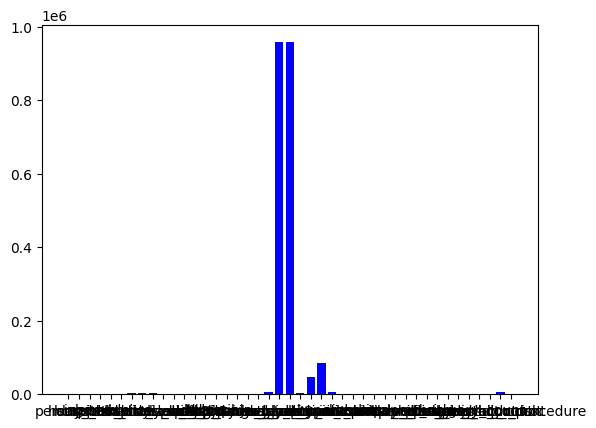

In [40]:
colores = []
for f in df_resultados.index:
    if f in pasan_prueba:
        colores.append('b')
    else:
        colores.append('r')
plt.figure()
plt.bar(df_resultados.index, df_resultados.valor_f, color = colores)
plt.show()

## MinMaxEscaler

In [42]:
from sklearn.preprocessing import MinMaxScaler
## MinMaxEsxcaler
escalador = MinMaxScaler()
escala = escalador.fit_transform(X)
x_escalada = pd.DataFrame(escala, columns=X.columns)
x_escalada

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,0.801848,0.79,0.011030,0.250,0.142857,0.380208,0.08,0.0,0.0,0.272727,...,0.0,1.0,1.0,0.000000,0.000000,0.142857,0.000000,0.142857,1.0,0.0
1,0.929919,0.53,0.083435,0.125,0.000000,0.481771,0.12,0.0,0.0,0.181818,...,0.0,1.0,0.0,0.285714,0.000000,0.142857,0.142857,0.000000,1.0,0.0
2,0.764348,0.63,0.286509,0.250,0.285714,0.218750,0.04,0.0,0.0,0.181818,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,1.0,0.0
3,0.840048,0.36,0.035637,0.000,0.000000,0.250000,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.142857,0.000000,0.142857,0.000000,0.142857,0.0,0.0
4,0.809178,0.21,0.077873,0.250,0.285714,0.486979,0.12,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.285714,0.166667,0.000000,0.000000,0.142857,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69912,0.874989,0.53,0.068257,0.125,0.000000,0.567708,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.142857,0.000000,0.142857,0.000000,0.000000,1.0,0.0
69913,0.062651,0.50,0.118884,0.125,0.000000,0.421875,0.00,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.0,0.0
69914,0.548865,0.42,0.019327,0.125,0.000000,0.406250,0.00,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
69915,0.768208,0.41,0.076176,0.000,0.000000,0.463542,0.28,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.142857,0.000000,0.142857,0.000000,0.000000,0.0,0.0


## SelectKBest

In [73]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)

# #Get _support nos permite ver los na un booleano para asi poder seleccionar las columnas
selected_features = X.columns[selector.get_support()]
print("Top 5 variables más relevantes:")
print(selected_features)

# Opcional: ver los puntajes F y p-valores
scores = pd.DataFrame({
    "Variable": X.columns,
    "F_value": selector.scores_,
    "p_value": selector.pvalues_
}).sort_values(by="F_value", ascending=False)

print("\nRanking completo:")
print(scores.head(20))

Top 5 variables más relevantes:
Index(['age', 'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'risk_score', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'arthritis',
       'mental_health', 'is_high_risk', 'had_major_procedure'],
      dtype='object')

Ranking completo:
                       Variable        F_value        p_value
21              monthly_premium  957581.225391   0.000000e+00
20               annual_premium  957578.570123   0.000000e+00
24            total_claims_paid   83580.556833   0.000000e+00
23             avg_claim_amount   46826.992355   0.000000e+00
19                   risk_score    7089.778561   0.000000e+00
25                chronic_count    6568.569503   0.000000e+00
41                 is_high_risk    4648.934120   0.000000e+00
8   days_hospitalized_last_

In [65]:
selector.get_support()

array([False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False])

## Mejor regresión

In [66]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [67]:
X[selected_features]

,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,risk_score,annual_premium,monthly_premium,avg_claim_amount,total_claims_paid,chronic_count,is_high_risk
1,2,0,0,1.0000,445.10,37.09,297.27,1189.08,2,1
4,3,0,0,0.8681,500.93,41.74,1002.24,1002.24,2,1
5,1,0,0,0.6923,528.68,44.06,1220.04,1220.04,1,1
6,0,0,0,0.1978,414.60,34.55,0.00,0.00,0,0
7,3,0,0,0.3187,445.22,37.10,703.03,1406.06,1,0
...,...,...,...,...,...,...,...,...,...,...
99992,0,0,0,0.7473,802.23,66.85,0.00,0.00,0,1
99995,0,0,0,0.3516,329.32,27.44,0.00,0.00,0,0
99996,0,0,0,0.2637,424.21,35.35,0.00,0.00,0,0
99997,7,0,0,0.4505,534.90,44.58,312.56,2500.48,1,0


In [68]:
lr = LinearRegression()
efs = EFS(estimator = lr,        # Use linear regression as the classifier/estimator
          min_features = 1,      # The minimum number of features to consider is 1
          max_features = 5,      # The maximum number of features to consider is 4
          scoring = 'neg_mean_absolute_error',  # The metric to use to evaluate the classifier is accuracy
          cv = 5)
efs = efs.fit(X[selected_features], y)

Features: 637/637

In [69]:
df_resultados_efs = pd.DataFrame(efs.get_metric_dict()).T
df_resultados_efs = df_resultados_efs.sort_values('avg_score', ascending = False)
df_resultados_efs

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
591,"(2, 3, 5, 6, 7)","[-445.05080904563243, -452.6271351512006, -457...",-450.741693,"(days_hospitalized_last_3yrs, risk_score, mont...",5.355395,4.16668,2.08334
585,"(2, 3, 4, 6, 7)","[-445.053739191204, -452.62508862806555, -457....",-450.742481,"(days_hospitalized_last_3yrs, risk_score, annu...",5.352598,4.164503,2.082251
486,"(0, 3, 5, 6, 7)","[-445.3242172209154, -453.002001524006, -457.3...",-450.793841,"(visits_last_year, risk_score, monthly_premium...",5.331857,4.148366,2.074183
480,"(0, 3, 4, 6, 7)","[-445.3289170554937, -453.00127534982425, -457...",-450.795601,"(visits_last_year, risk_score, annual_premium,...",5.328705,4.145914,2.072957
556,"(1, 3, 5, 6, 7)","[-445.43718893576715, -452.7279480826332, -457...",-450.950764,"(hospitalizations_last_3yrs, risk_score, month...",5.453293,4.242847,2.121424
...,...,...,...,...,...,...,...
9,"(9,)","[-1873.418954547574, -1916.7342364536194, -189...",-1898.14395,"(is_high_risk,)",18.394902,14.311859,7.155929
19,"(1, 2)","[-1911.6622227252092, -1964.5505998234134, -19...",-1932.264873,"(hospitalizations_last_3yrs, days_hospitalized...",23.47112,18.261329,9.130664
2,"(2,)","[-1911.438393687386, -1965.008830575426, -1928...",-1932.28848,"(days_hospitalized_last_3yrs,)",23.656134,18.405276,9.202638
0,"(0,)","[-1915.4920344183029, -1960.8605525766995, -19...",-1939.824933,"(visits_last_year,)",18.975785,14.763805,7.381903


### Gráfica

[]

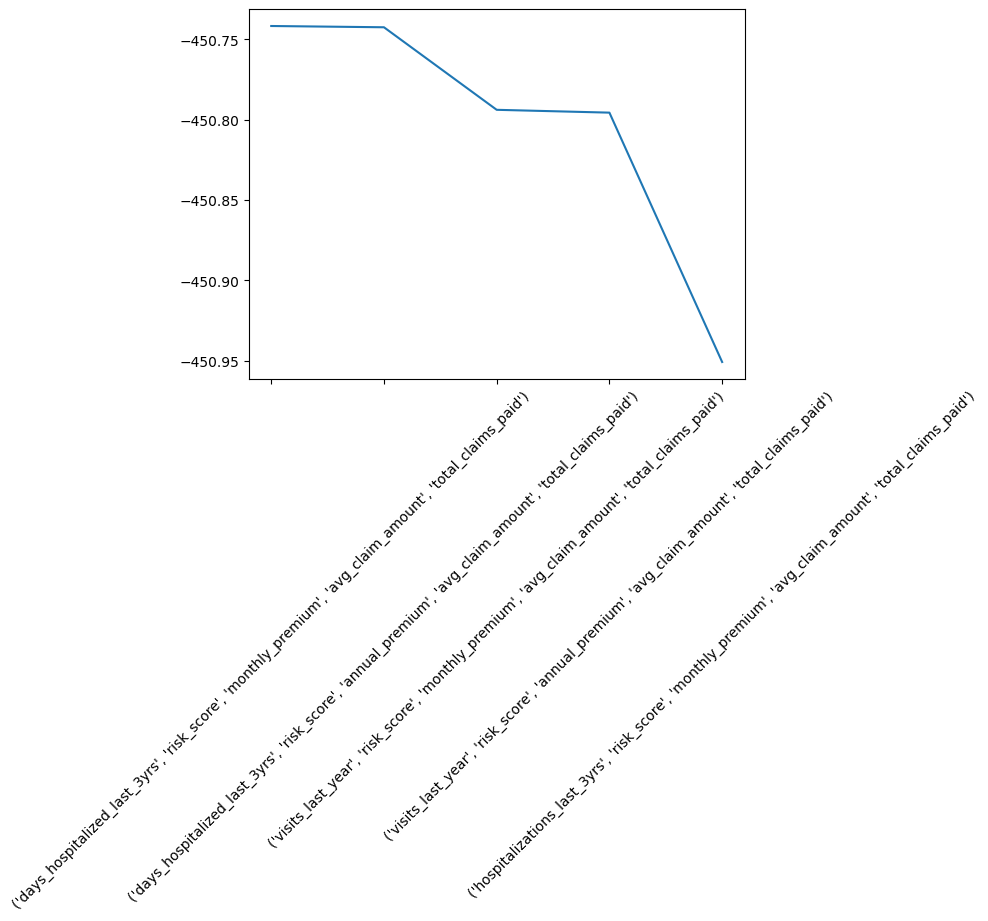

In [70]:
plt.figure()

plt.plot(
    df_resultados_efs.iloc[:5].feature_names.astype(str),
    df_resultados_efs.iloc[:5].avg_score,
)

plt.xticks(rotation = 45)

plt.plot()

# Conclusiones

## Lógica, no investigación

 En mi top1 y top2, se encuentran las variables de Monthly Premium y Annual premium las cuales por lógica y en el análisis de correlación, están muy correlacionadas a mi variable objetivo, por lo q lo ideal es excluirlas del análisis.

## Variables rebunantes

Las variables que se decidieron no incluir **—systolic_bp, diastolic_bp, medication_count, arthritis y diabetes—** fueron excluidas por ser redundantes o de menor aporte explicativo en el modelo.
Las presiones sistólica y diastólica suelen correlacionarse fuertemente entre sí y también con variables más generales como **risk_score o hypertension**, por lo que añaden poca información nueva.
De forma similar, medication_count tiende a reflejar indirectamente el número de enfermedades crónicas *(chronic_count)*, generando colinealidad.
Por último, variables como arthritis y diabetes ya están implícitamente representadas dentro de indicadores agregados de riesgo o condiciones crónicas, por lo que incluirlas individualmente podría sobreponderar ciertos diagnósticos sin mejorar la capacidad predictiva del modelo.

## Variables a incluir

- **total_claims_paid**  
  - Refleja el gasto histórico total del paciente; fuerte indicador directo del costo médico.

- **avg_claim_amount**  
  - Captura la severidad promedio de los siniestros; complementa a la frecuencia de reclamos.

- **risk_score**  
  - Resume condiciones de salud y factores de riesgo; alto valor predictivo en costos médicos.

- **chronic_count**  
  - Más enfermedades crónicas implican mayor gasto recurrente en atención y medicamentos.

- **is_high_risk**  
  - Identifica individuos con alta probabilidad de gasto futuro elevado.

- **days_hospitalized_last_3yrs**  
  - La duración de hospitalizaciones previas se asocia con mayores costos médicos.

- **hospitalizations_last_3yrs**  
  - Mayor frecuencia de hospitalizaciones refleja una salud más frágil y alto gasto potencial.

- **visits_last_year**  
  - Incremento en consultas médicas suele anticipar mayor utilización del sistema de salud.

- **claims_count**  
  - Representa la frecuencia de siniestros; junto con la severidad, explica el costo total.

- **had_major_procedure**  
  - Procedimientos grandes o invasivos generan altos costos unitarios.

- **hypertension**  
  - Condición común y costosa; asociada a complicaciones crónicas.

- **age**  
  - La edad avanzada incrementa la probabilidad de padecimientos y costos médicos.

- **mental_health**  
  - Problemas mentales se vinculan con mayor uso de servicios y comorbilidades.





## Referencias

 - https://pmc.ncbi.nlm.nih.gov/articles/PMC4772316/
 - https://www.ajmc.com/view/risk-stratification-methods-for-identifying-patients-for-care-coordination
 - https://www.sciencedirect.com/science/article/pii/S016885102300088X